A notebook for capturing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

Fourth round of experiments after procedure upgrade adding 8th camera, and switching some camera positions.

Using a gain of 4.27 dB to raise apparent full well to 20000 e-, and sensitivity to 4.88 e-/DN.
Reducing Blacklevel to 8 DN from 128 DN, to increase sensitive range.

# Process Overview

The objective of this notebook is to capture uniformly illuminated and dark images (across the sampling area) that can be used to characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will  capture images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=255).

For each exposure, we will capture:
- 2 illuminated images of the target
- 25 dark images (to reduce read noise by factor of 5)

We will choose exposures with the following procedure:
1. Start at minimum exposure - capture pair, record exposure
2. Double exposure - capture pair, record exposure
3. Repeat until all pixels are saturated - i.e. all = 255
4. Reduce exposure by factor of 0.90, and repeat, until 0 pixels are saturated.

This process will be repeated for SCT99 and SCT5, and then again for dark images.
Then, 25 dark frames will be captured for each exposure, and the mean and standard deviation TIFF float images recorded.


# Camera Setup

Here we configure and setup the camera capture objects.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Frame Rate set to : 5.0 FPS
Brightness Value set to 0
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Exposure Auto Max Auto set to 0
Trigger Enable set to 0
De

In [3]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import sleep

Here we are only going to process images over the calibration target itself, so we restrict the ROI to a very small field of 32x32 pixels.
Statistics are therfore computed over 1024 pixels in each case.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 290.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.13411380350589752
Exposure set to 0.13411299884319305 (err of 8.006303185703612e-07
Trial 1:
Imaging with Exposure: 0.13411299884319305 s
+Good exposure 0.13411299884319305 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.13411299884319305
Exposure Value set to 0.025481469929218292
Exposure set to 0.025481000542640686 (err of 4.6923756599065447e-07
Trial 2:
Imaging with Exposure: 0.025481000542640686 s
+Good exposure 0.025481000542640686 Image recieved
Quantile: 3689.0, Target: 3889.2999999999997
Exposure current Value: 0.025481000542640686
Expo

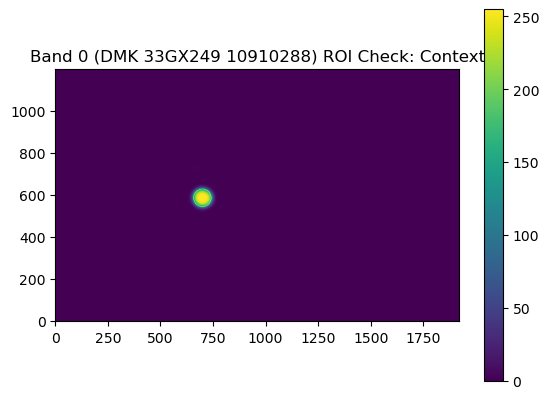

Imaging with Exposure: 0.026863999664783478 s
+Good exposure 0.026863999664783478 Image recieved


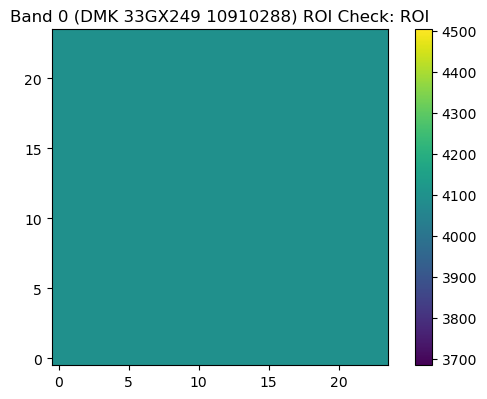

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 406.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.09579557180404663
Exposure set to 0.09579499810934067 (err of 5.729431676315677e-07
Trial 1:
Imaging with Exposure: 0.09579499810934067 s
+Good exposure 0.09579499810934067 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.09579499810934067
Exposure Value set to 0.01820104941725731
Exposure set to 0.01820099912583828 (err of 5.0514936445617e-08
Trial 2:
Imaging with Exposure: 0.01820099912583828 s
+Good exposure 0.01820099912583828 Image recieved
Quantile: 3710.0, Target: 3889.2999999999997
Exposure current Val

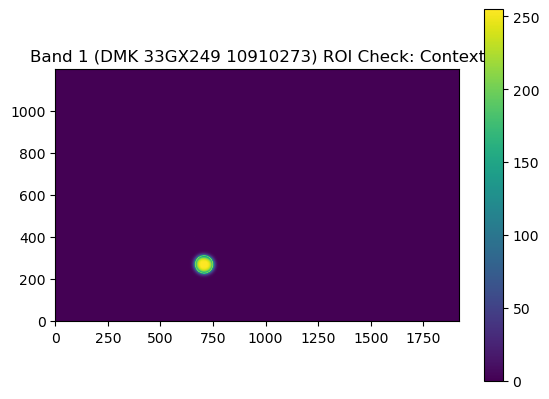

Imaging with Exposure: 0.01907999999821186 s
+Good exposure 0.01907999999821186 Image recieved


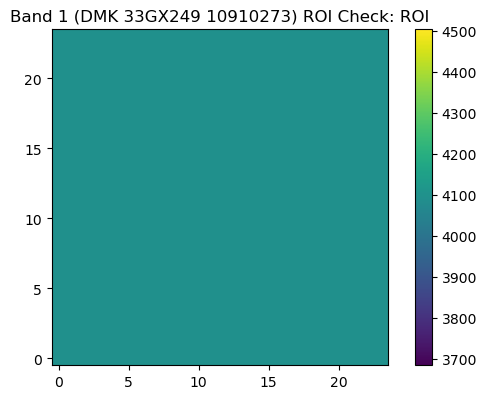

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1494.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.005206559784710407
Exposure set to 0.005206000059843063 (err of 5.597590750586884e-07
Trial 1:
Imaging with Exposure: 0.005206000059843063 s
+Good exposure 0.005206000059843063 Image recieved
Quantile: 3874.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.005206000059843063
Imaging with Exposure: 0.005206000059843063 s
+Good exposure 0.005206000059843063 Image recieved
x: 272
y: 946


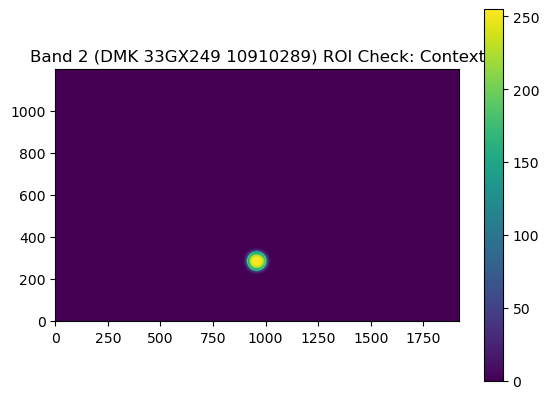

Imaging with Exposure: 0.005206000059843063 s
+Good exposure 0.005206000059843063 Image recieved


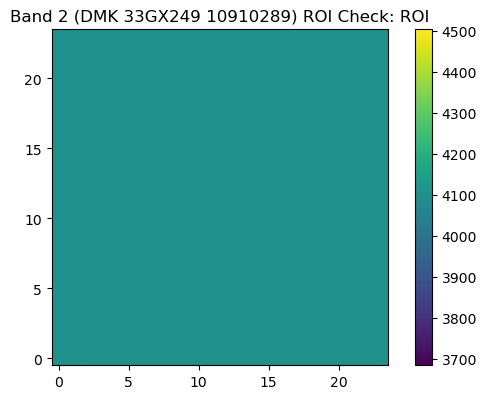

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 196.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.19843368232250214
Exposure set to 0.19843299686908722 (err of 6.860253942420069e-07
Trial 1:
Imaging with Exposure: 0.19843299686908722 s
+Good exposure 0.19843299686908722 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.19843299686908722
Exposure Value set to 0.03770226985216141
Exposure set to 0.03770200163125992 (err of 2.677738666495566e-07
Trial 2:
Imaging with Exposure: 0.03770200163125992 s
+Good exposure 0.03770200163125992 Image recieved
Quantile: 3725.0, Target: 3889.2999999999997
Exposure current V

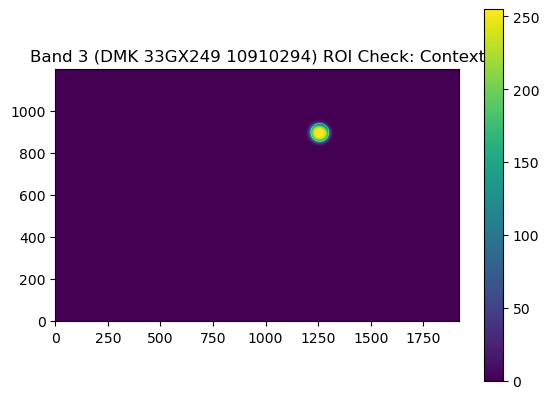

Imaging with Exposure: 0.03936399891972542 s
+Good exposure 0.03936399891972542 Image recieved


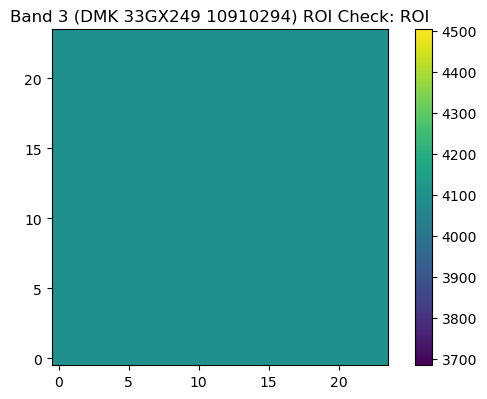

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 790.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009846329689025879
Exposure set to 0.009846000000834465 (err of 3.295807651220589e-07
Trial 1:
Imaging with Exposure: 0.009846000000834465 s
+Good exposure 0.009846000000834465 Image recieved
Quantile: 3850.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.009846000000834465
Imaging with Exposure: 0.009846000000834465 s
+Good exposure 0.009846000000834465 Image recieved
x: 590
y: 1242


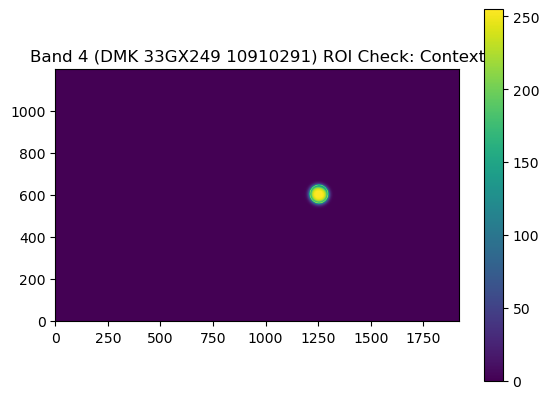

Imaging with Exposure: 0.009846000000834465 s
+Good exposure 0.009846000000834465 Image recieved


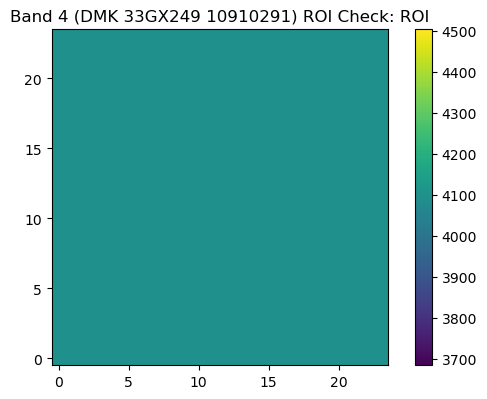

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 700.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.011112285777926445
Exposure set to 0.011111999861896038 (err of 2.863801949245376e-07
Trial 1:
Imaging with Exposure: 0.011111999861896038 s
+Good exposure 0.011111999861896038 Image recieved
Quantile: 3874.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.011111999861896038
Imaging with Exposure: 0.011111999861896038 s
+Good exposure 0.011111999861896038 Image recieved
x: 248
y: 1298


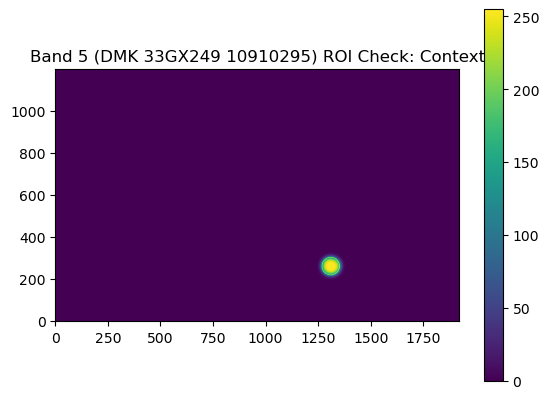

Imaging with Exposure: 0.011111999861896038 s
+Good exposure 0.011111999861896038 Image recieved


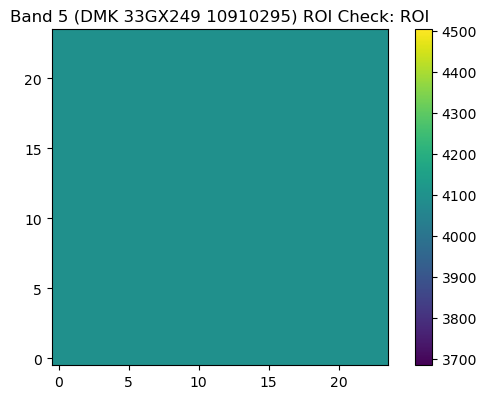

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1617.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.004810513462871313
Exposure set to 0.004809999838471413 (err of 5.136862432893533e-07
Trial 1:
Imaging with Exposure: 0.004809999838471413 s
+Good exposure 0.004809999838471413 Image recieved
Quantile: 3846.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.004809999838471413
Imaging with Exposure: 0.004809999838471413 s
+Good exposure 0.004809999838471413 Image recieved
x: 876
y: 656


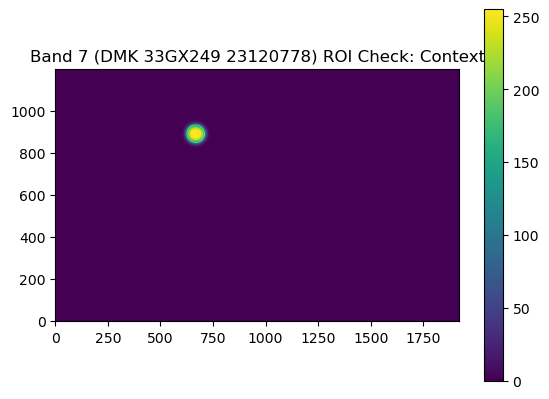

Imaging with Exposure: 0.004809999838471413 s
+Good exposure 0.004809999838471413 Image recieved


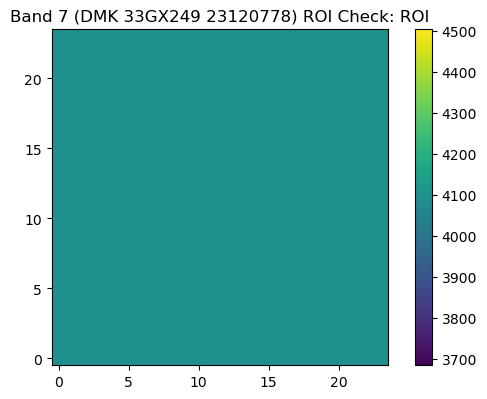

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 142.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.27389436960220337
Exposure set to 0.2738940119743347 (err of 3.6723213270306587e-07
Trial 1:
Imaging with Exposure: 0.2738940119743347 s
+Good exposure 0.2738940119743347 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.2738940119743347
Exposure Value set to 0.05203986167907715
Exposure set to 0.052039001137018204 (err of 8.611381053860723e-07
Trial 2:
Imaging with Exposure: 0.052039001137018204 s
+Good exposure 0.052039001137018204 Image recieved
Quantile: 3718.0, Target: 3889.2999999999997
Exposure current V

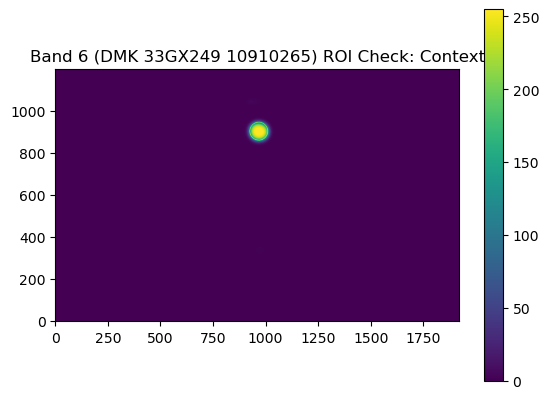

Imaging with Exposure: 0.05443599820137024 s
+Good exposure 0.05443599820137024 Image recieved


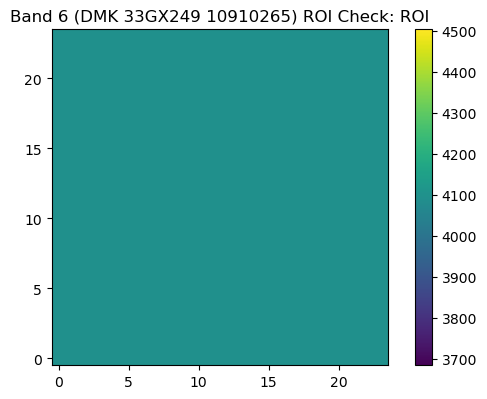

-----------------------------------


In [4]:
osc.find_camera_rois(cameras, roi_size=24)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 464.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.014117241837084293
Exposure set to 0.014116999693214893 (err of 2.4235662843784256e-07
Trial 1:
Imaging with Exposure: 0.014116999693214893 s
+Good exposure 0.014116999693214893 Image recieved
Quantile: 3184.0, Target: 3275.2000000000003
Exposure current Value: 0.014116999693214893
Exposure Value set to 0.014521355740725994
Exposure set to 0.014520999975502491 (err of 3.559903321258273e-07
Trial 2:
Imaging with Exposure: 0.014520999975502491 s
+Good exposure 0.014520999975502491 Image recieved
Quantile: 3278.0, Target: 3275.2000000000003
Exposure current Value: 0.014520999975502491
Exposure Value set to 

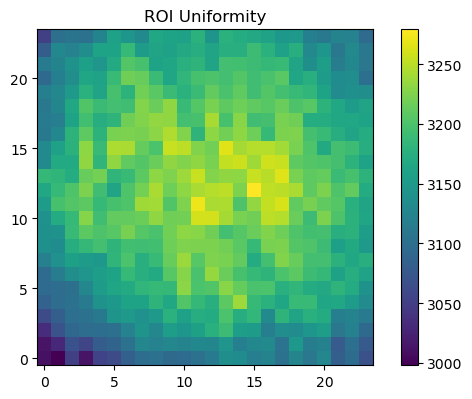

ROI Uniformity: 1.4926332571670926 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 730.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.008973151445388794
Exposure set to 0.008972999639809132 (err of 1.5147132416404308e-07
Trial 1:
Imaging with Exposure: 0.008972999639809132 s
+Good exposure 0.008972999639809132 Image recieved
Quantile: 3199.0, Target: 3275.2000000000003
Exposure current Value: 0.008972999639809132
Exposure Value set to 0.009186736308038235
Exposure set to 0.009185999631881714 (err of 7.363544586649895e-07
Trial 2:
Imaging with Exposure: 0.009185999631881714 s
+Good exposure 0.009185999631881714 Image recieved
Quantile: 3281.0, Target: 3275.20000000

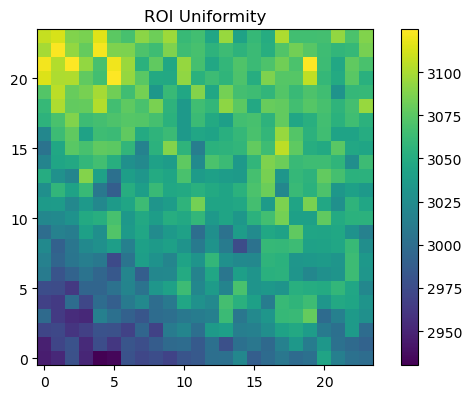

ROI Uniformity: 1.1446192649058384 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2327.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0028149550780653954
Exposure set to 0.002814000006765127 (err of 9.55004462765193e-07
Trial 1:
Imaging with Exposure: 0.002814000006765127 s
+Good exposure 0.002814000006765127 Image recieved
Quantile: 3241.0, Target: 3275.2000000000003
Exposure current Value: 0.002814000006765127
Exposure Value set to 0.0028436940629035234
Exposure set to 0.0028429999947547913 (err of 6.941805482467943e-07
Trial 2:
Imaging with Exposure: 0.0028429999947547913 s
+Good exposure 0.0028429999947547913 Image recieved
Quantile: 3267.0, Target: 3275.2000

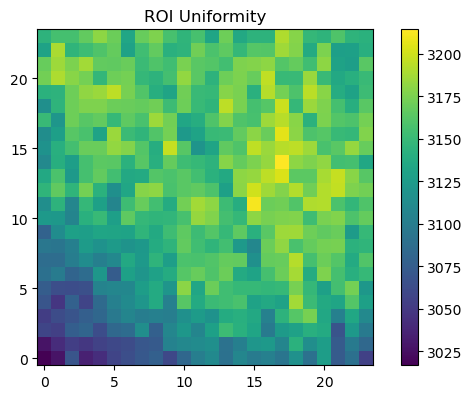

ROI Uniformity: 1.1137649317521203 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 452.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.01449203584343195
Exposure set to 0.014492000453174114 (err of 3.56333907224754e-08
Trial 1:
Imaging with Exposure: 0.014492000453174114 s
+Good exposure 0.014492000453174114 Image recieved
Quantile: 3198.0, Target: 3275.2000000000003
Exposure current Value: 0.014492000453174114
Exposure Value set to 0.014841838739812374
Exposure set to 0.014840999618172646 (err of 8.389947841590945e-07
Trial 2:
Imaging with Exposure: 0.014840999618172646 s
+Good exposure 0.014840999618172646 Image recieved
Quantile: 3276.0, Target: 3275.20000000000

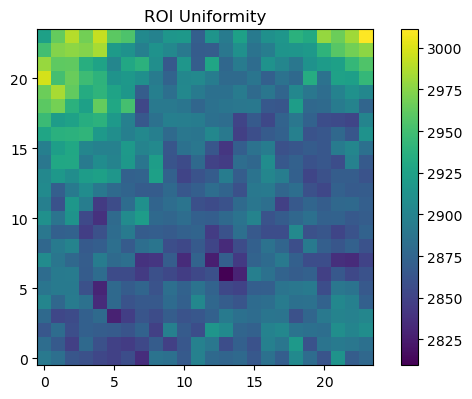

ROI Uniformity: 1.0682905522216508 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1142.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.005735902115702629
Exposure set to 0.005735000129789114 (err of 9.020690964426509e-07
Trial 1:
Imaging with Exposure: 0.005735000129789114 s
+Good exposure 0.005735000129789114 Image recieved
Quantile: 3227.0, Target: 3275.2000000000003
Exposure current Value: 0.005735000129789114
Exposure Value set to 0.005820660851895809
Exposure set to 0.0058200000785291195 (err of 6.607287486321695e-07
Trial 2:
Imaging with Exposure: 0.0058200000785291195 s
+Good exposure 0.0058200000785291195 Image recieved
Quantile: 3277.0, Target: 3275.20000

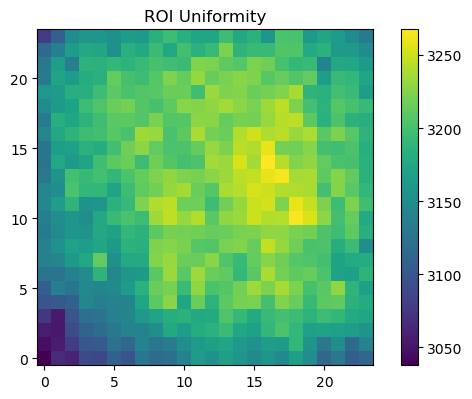

ROI Uniformity: 1.2385912989021943 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1081.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.006059574894607067
Exposure set to 0.006058999802917242 (err of 5.749529822084848e-07
Trial 1:
Imaging with Exposure: 0.006058999802917242 s
+Good exposure 0.006058999802917242 Image recieved
Quantile: 3225.0, Target: 3275.2000000000003
Exposure current Value: 0.006058999802917242
Exposure Value set to 0.00615331344306469
Exposure set to 0.0061530000530183315 (err of 3.1348326525078296e-07
Trial 2:
Imaging with Exposure: 0.0061530000530183315 s
+Good exposure 0.0061530000530183315 Image recieved
Quantile: 3264.0, Target: 3275.20000

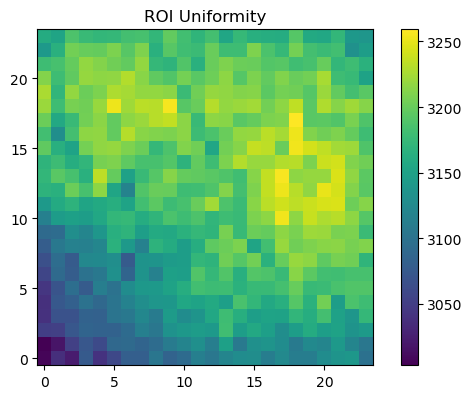

ROI Uniformity: 1.4763831470869813 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2538.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0025809300132095814
Exposure set to 0.002580000087618828 (err of 9.299010050121265e-07
Trial 1:
Imaging with Exposure: 0.002580000087618828 s
+Good exposure 0.002580000087618828 Image recieved
Quantile: 3275.0, Target: 3275.2000000000003
Success after 1 trials
Exposure current Value: 0.002580000087618828
Imaging with Exposure: 0.002580000087618828 s
+Good exposure 0.002580000087618828 Image recieved
Imaging with Exposure: 0.002580000087618828 s
+Good exposure 0.002580000087618828 Image recieved
Imaging with Exposure: 0.002580000087

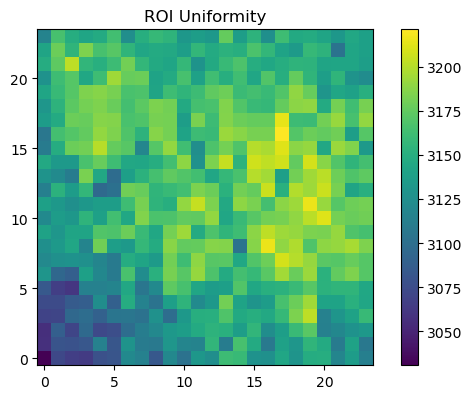

ROI Uniformity: 0.9874194170582669 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 227.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.14428193867206573
Exposure set to 0.14428099989891052 (err of 9.452801050247039e-07
Trial 1:
Imaging with Exposure: 0.14428099989891052 s
+Good exposure 0.14428099989891052 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.14428099989891052
Exposure Value set to 0.023084960877895355
Exposure set to 0.023083999752998352 (err of 9.602308273307103e-07
Trial 2:
Imaging with Exposure: 0.023083999752998352 s
+Good exposure 0.023083999752998352 Image recieved
Quantile: 2511.0, Target: 3275.2000000000003


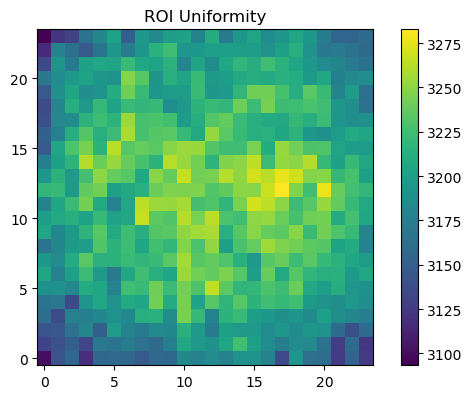

ROI Uniformity: 0.982543943897732 %
-----------------------------------


In [5]:
osc.check_channel_roi_uniformity(cameras)

# Calibration Functions

Here we define simple functions for controlling the cameras during the calibration routines.

In [6]:
def camera_calibration_sequence(camera, subject) -> pd.DataFrame:
    """Capture pairs of images with increasing exposure time until all
    pixels are saturated, then decrease exposure time until no pixels are 
    saturated.
    
    Args:
        camera: Camera object to capture images from.
    
    Returns:
        DataFrame with columns:
            - exposure
            - mean
            - std
    """
    camera.set_property('Exposure', 'Auto', 0, 'Switch')        
    t_min = 1.0/16666 # (seconds) verify that this is the minimum exposure time
    t_max = 50.0
    t_exp = t_min
    up_scale = 1.2
    dwn_scale = 0.99
    t_scale = up_scale
    img_type='calibration'
    stop = False    
    cmd_exposures = []
    exposures = []
    means = []
    stds = []
    shots = []
    sat_val = camera.max_dn
    while stop is False:
        print(f'Exposure: {t_exp:.7f} s')
        camera.set_property('Exposure', 'Value', t_exp, 'AbsoluteValue')
        img_1 = camera.image_capture(roi=True)
        img_2 = camera.image_capture(roi=True)
        name_1 = f'{t_exp*1E6:.0f}us_1'
        name_2 = f'{t_exp*1E6:.0f}us_2'
        camera.save_image(name_1, subject, img_type, img_1)
        camera.save_image(name_2, subject, img_type, img_2)
        exposures.append(camera.get_exposure_value())
        cmd_exposures.append(t_exp)
        mean = np.mean([np.mean(img_1), np.mean(img_2)])
        std = np.mean([np.std(img_1), np.std(img_2)])
        shot = np.sqrt(np.mean((img_1 - img_2)**2)/2)
        means.append(mean)
        stds.append(std)
        shots.append(shot)
        if mean >= sat_val * 0.999:
            t_scale = dwn_scale
        if t_scale == dwn_scale:
            # n_sat = (np.sum(img_1 == sat_val) + np.sum(img_2 == sat_val)) / 2
            if mean <= sat_val * 0.80:
                stop = True
        else:
            if t_exp*t_scale > t_max:
                t_scale = dwn_scale
        t_exp = t_exp * t_scale

    results = pd.DataFrame({'exposure': exposures, 'raw mean': means, 'raw standard deviation': stds, 'shot and read noise': shots})
    results.sort_values('exposure', inplace=True)

    print(results)

    cwl_str = str(int(camera.camera_props['cwl']))
    channel = str(camera.camera_props['number'])+'_'+cwl_str
    subject_dir = Path('..', 'data', subject, channel)
    subject_dir.mkdir(parents=True, exist_ok=True)
    filename = 'exposures.csv'
    img_file =str(Path(subject_dir, filename).with_suffix('.tif'))

    results['exposure'].to_csv(f'{subject}_exposures.csv', index=False)

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    ax[0].plot(results['exposure'], results['raw mean'])
    ax[0].set_xlabel('Exposure (s)')
    ax[0].set_ylabel('Mean Pixel Value')
    results.sort_values('raw mean', inplace=True)
    ax[1].loglog(results['raw mean'], results['raw standard deviation'], label='Total Noise')
    ax[1].loglog(results['raw mean'], results['shot and read noise'], label='Shot and Read Noise')
    ax[1].set_xlabel('Mean Pixel Value')
    ax[1].set_ylabel('Standard Deviation')
    plt.show()
    return cmd_exposures

# SCT99 10 FPS

Output:
- SCT99 Exposure List
- SCT99 Lit Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_080623_5fps\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_080623_5fps\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_080623_5fps\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 wri

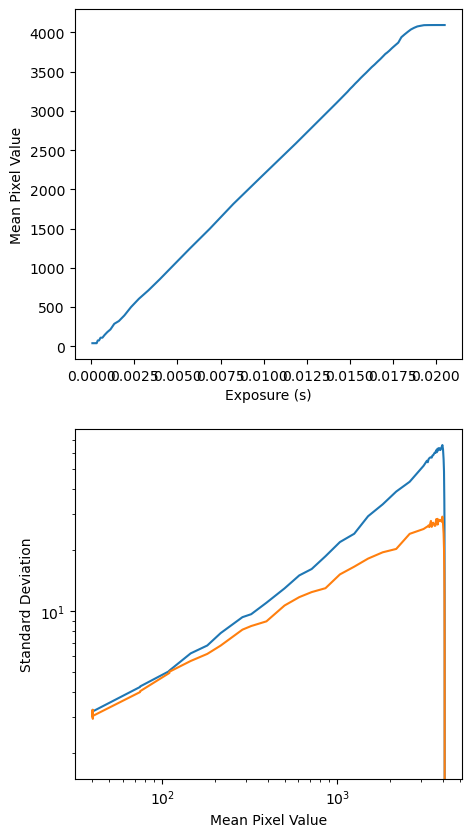

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_080623_5fps\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_080623_5fps\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_080623_5fps\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 wri

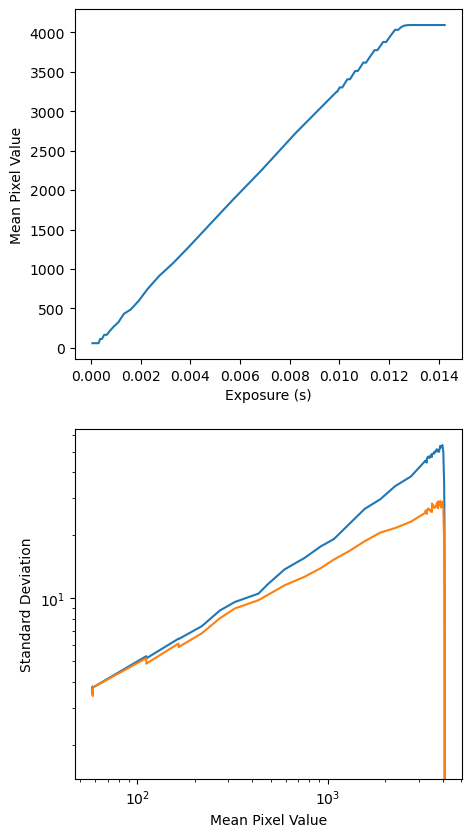

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_080623_5fps\2_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_080623_5fps\2_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_080623_5fps\2_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 wri

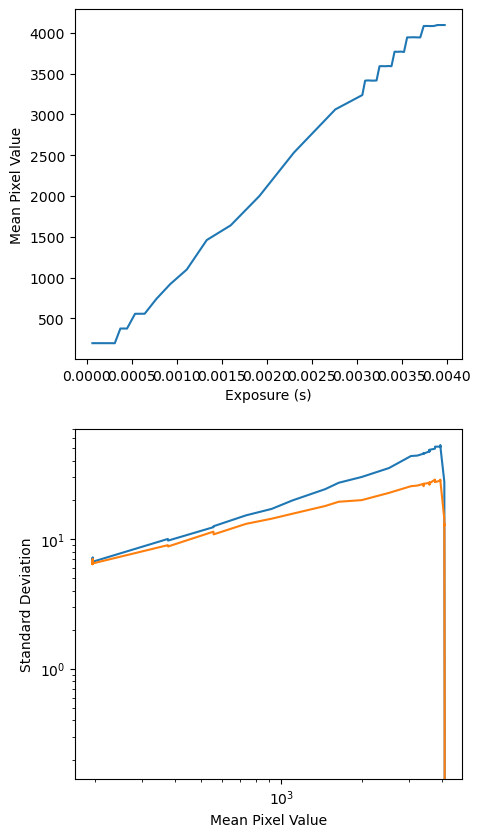

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_080623_5fps\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_080623_5fps\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_080623_5fps\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 wri

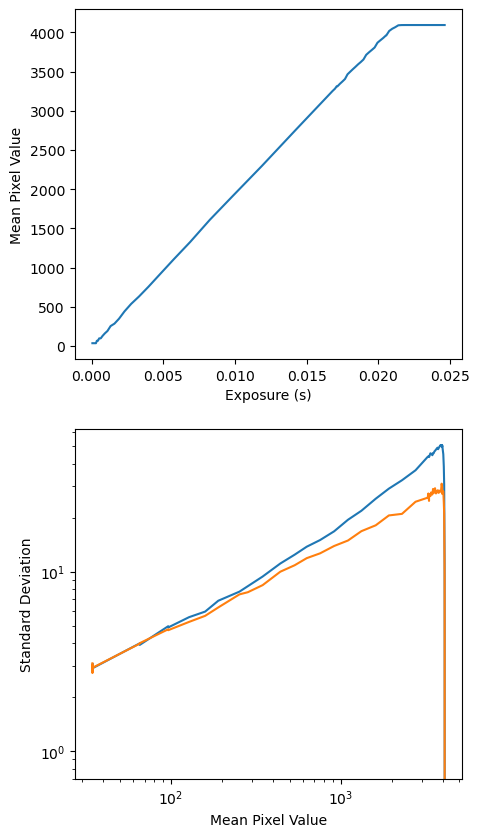

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_080623_5fps\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_080623_5fps\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_080623_5fps\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 wri

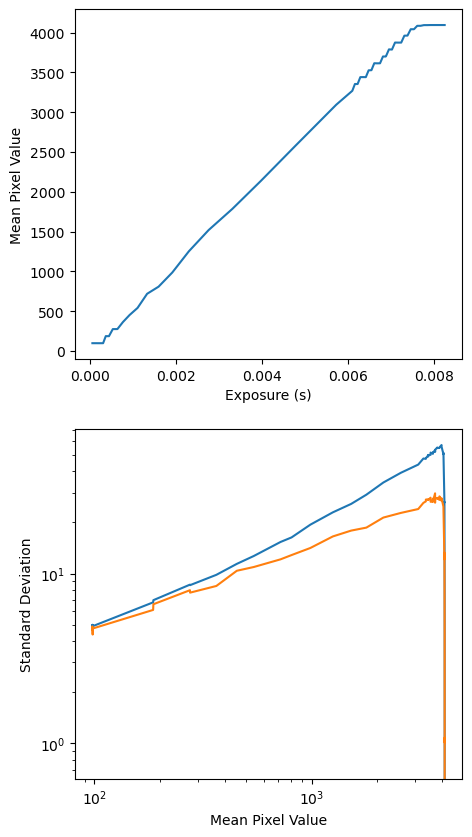

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_080623_5fps\5_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_080623_5fps\5_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_080623_5fps\5_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 wri

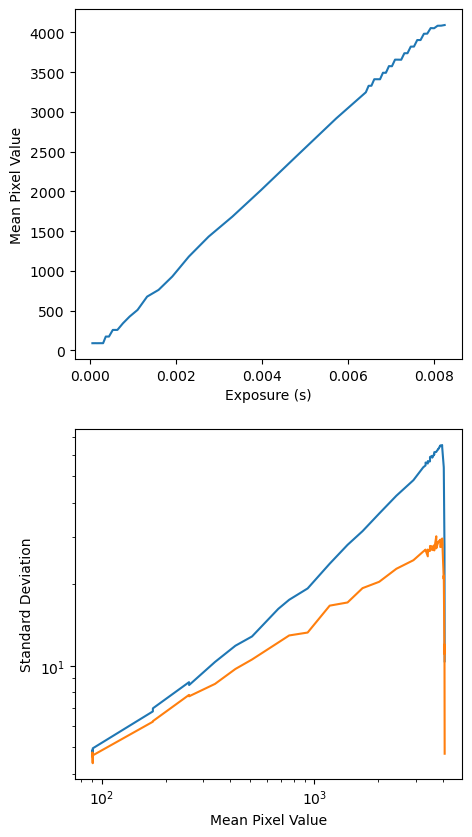

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_080623_5fps\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_080623_5fps\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_080623_5fps\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 wri

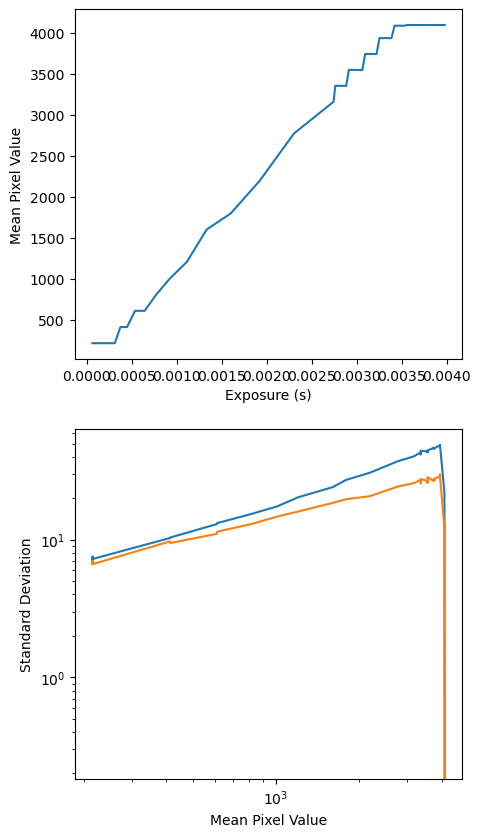

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_080623_5fps\6_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_080623_5fps\6_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_080623_5fps\6_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 wri

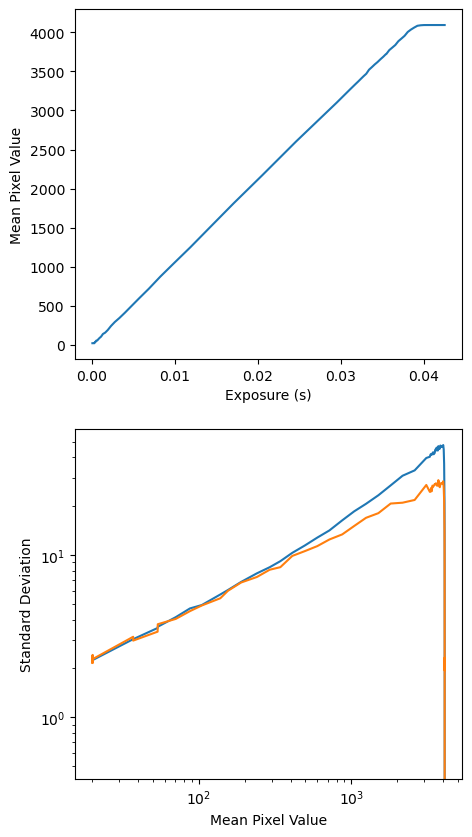

In [12]:
sct99_exposures = {}
for camera in cameras:
    sct99_exposures[camera] = camera_calibration_sequence(camera, 'SCT99_080623_5fps')

# SCT5 Procedure

Output:
- SCT5 Exposure List
- SCT5 Lit Image Directory

In [ ]:
osc.check_channel_roi_uniformity(cameras)

In [ ]:
sct5_exposures = {}
for camera in cameras:
    sct5_exposures[camera] = camera_calibration_sequence(camera, 'SCT5_080623')

# Dark Signal Procedure

Output:
- Dark Exposure List
- Dark Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_080623_5fps\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_080623_5fps\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_080623_5fps\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 writte

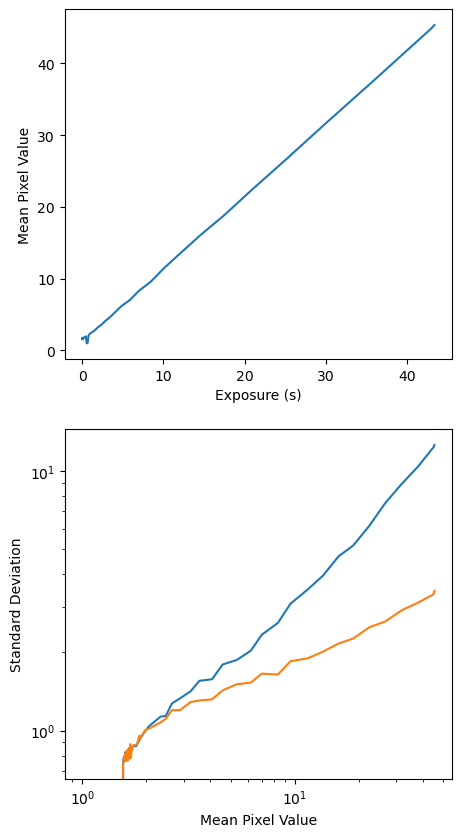

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_080623_5fps\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_080623_5fps\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_080623_5fps\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 writte

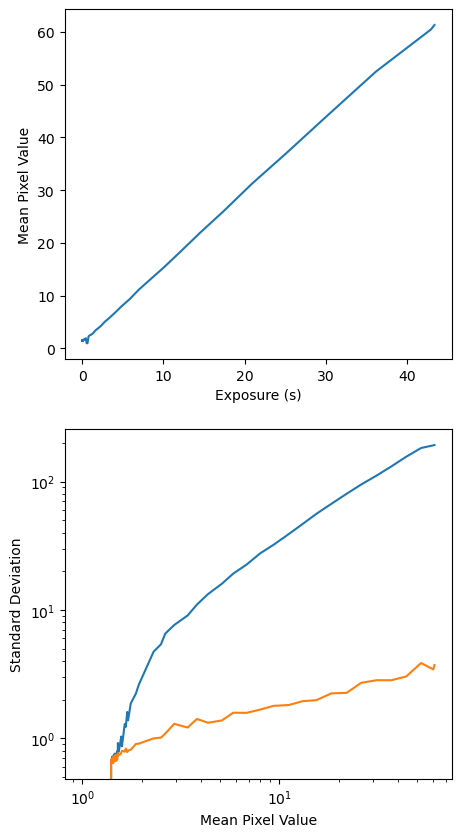

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_080623_5fps\2_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_080623_5fps\2_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_080623_5fps\2_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 writte

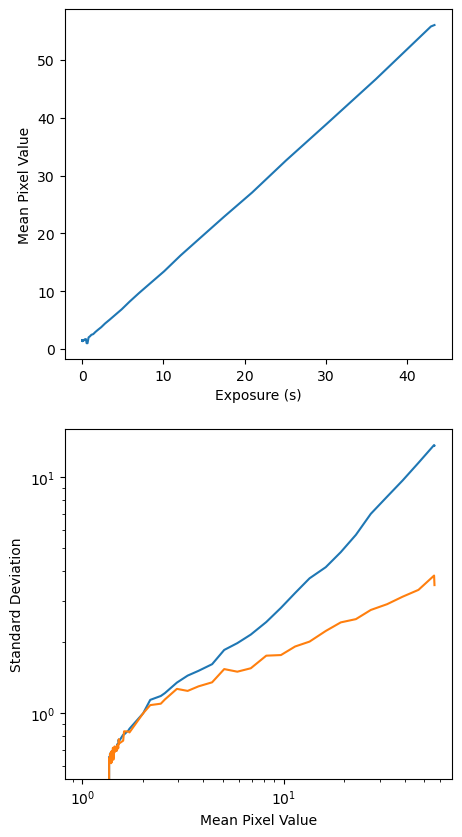

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_080623_5fps\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_080623_5fps\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_080623_5fps\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 writte

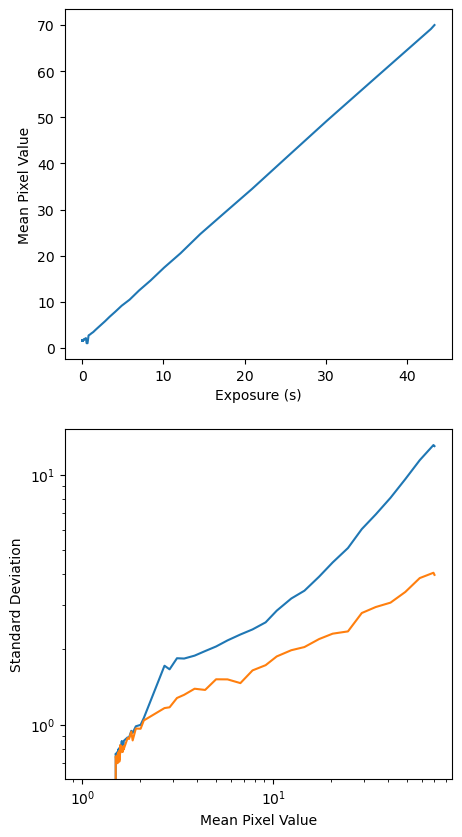

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_080623_5fps\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_080623_5fps\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_080623_5fps\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 writte

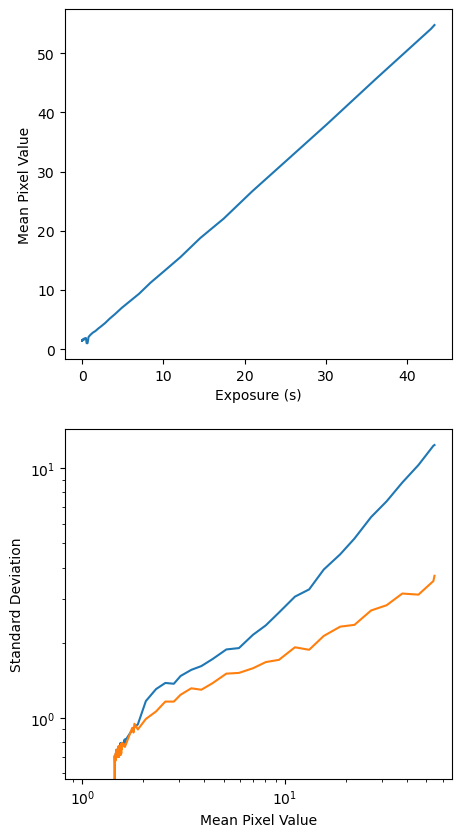

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_080623_5fps\5_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_080623_5fps\5_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_080623_5fps\5_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 writte

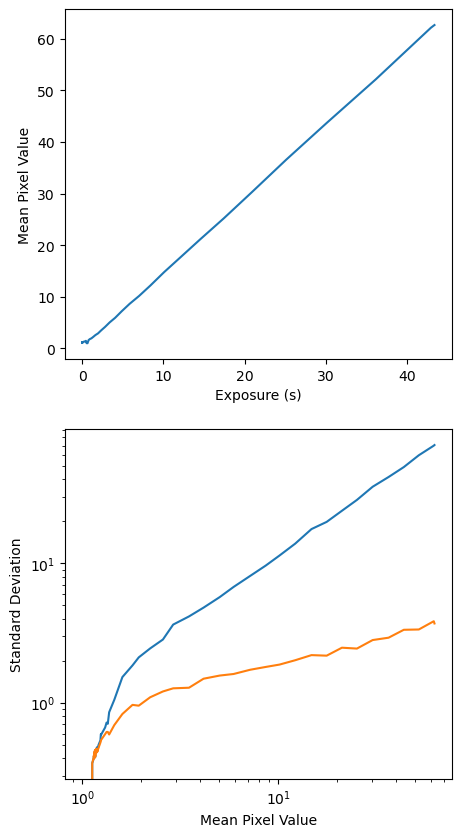

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_080623_5fps\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_080623_5fps\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_080623_5fps\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 writte

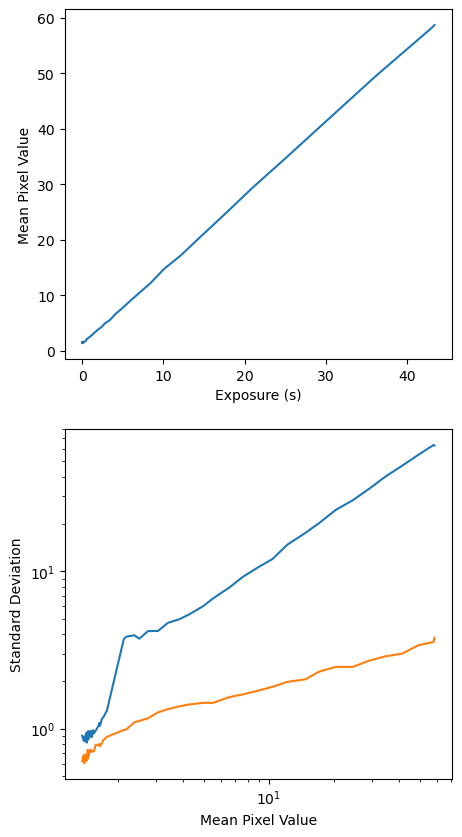

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_080623_5fps\6_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_080623_5fps\6_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_080623_5fps\6_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 writte

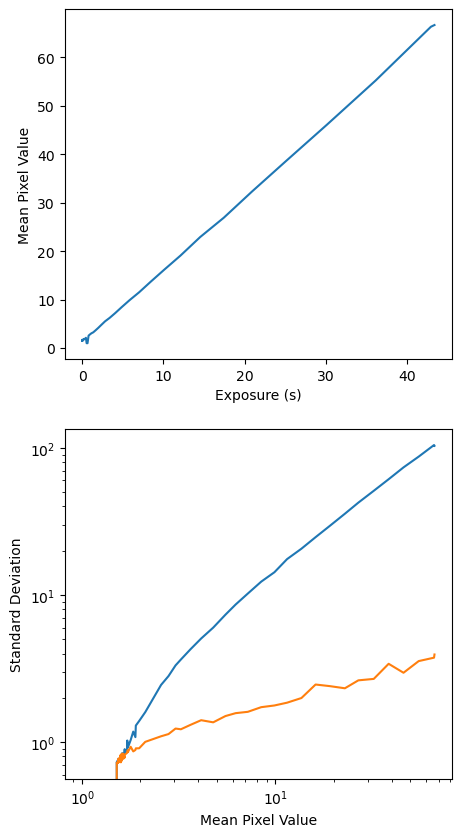

In [15]:
for camera in cameras:
    dark_exposures = camera_calibration_sequence(camera, 'dark_080623_5fps')

# Dark Frame Capture

Output:
- addition of dark mean frames to SCT99 directory
- addition of dark mean frames to SCT5 directory

In [14]:
for camera in cameras:
    exposures = sct99_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT99_080623_5fps', 'drk', drk_ave)

Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.9

In [ ]:
for camera in cameras:
    exposures = sct5_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT5_080623', 'drk', drk_ave)